In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
# Importing and reformatting data
julia_df = (pd
            .read_feather('julia_data.feather')
            .rename(columns={'ϵ':'radius', 'β':'rewire_prob'})
           )
julia_df['run'] -= 1

mesa_df = (pd
           .read_feather('mesa_data.feather')
           .rename(columns={'Step':'step', 'iteration':'run', 'Mean BMI':'mean_bmi'})
           .drop(columns=['RunId'])
          )

raw_netlogo_df = pd.read_excel('NetLogo_data.xlsx')

netlogo_df = pd.DataFrame()
for run in range(10):
    sub_df = raw_netlogo_df.copy()[['radius', 'rewire_prob', 'step', 'run '+str(run+1)]]
    sub_df['run'] = run
    sub_df = sub_df.rename(columns={'run '+str(run+1): 'mean_bmi'})
    netlogo_df = pd.concat([netlogo_df, sub_df])


In [107]:
julia_df

,step,mean_bmi,radius,rewire_prob,run
0,0,27.080877,0.0,0.1,0
1,1,27.086030,0.0,0.1,0
2,2,27.092564,0.0,0.1,0
3,3,27.100488,0.0,0.1,0
4,4,27.109188,0.0,0.1,0
...,...,...,...,...,...
8035,196,29.656816,0.4,0.9,9
8036,197,29.651816,0.4,0.9,9
8037,198,29.650816,0.4,0.9,9
8038,199,29.647816,0.4,0.9,9


In [138]:
mesa_df

,run,step,radius,rewire_prob,mean_bmi
0,0,0,0.0,0.1,27.130233
1,0,1,0.0,0.1,27.132621
2,0,2,0.0,0.1,27.134956
3,0,3,0.0,0.1,27.140956
4,0,4,0.0,0.1,27.143966
...,...,...,...,...,...
8035,9,196,0.4,0.9,26.229487
8036,9,197,0.4,0.9,26.229487
8037,9,198,0.4,0.9,26.229487
8038,9,199,0.4,0.9,26.229487


In [137]:
netlogo_df

,radius,rewire_prob,step,mean_bmi,run
0,0.0,0.1,0,26.583728,0
1,0.0,0.1,1,26.597943,0
2,0.0,0.1,2,26.612693,0
3,0.0,0.1,3,26.628776,0
4,0.0,0.1,4,26.645630,0
...,...,...,...,...,...
799,0.4,0.9,196,27.113964,9
800,0.4,0.9,197,27.110964,9
801,0.4,0.9,198,27.109964,9
802,0.4,0.9,199,27.108964,9


In [109]:
netlogo_df.head()

,radius,rewire_prob,step,run 1,run 2,run 3,run 4,run 5,run 6,run 7,run 8,run 9,run 10
0,0.0,0.1,0,26.583728,26.746970,26.504306,27.346385,27.839326,26.590670,27.026254,26.380383,27.463977,26.881512
1,0.0,0.1,1,26.597943,26.761565,26.511841,27.358089,27.857326,26.595074,27.053695,26.395459,27.470313,26.893512
2,0.0,0.1,2,26.612693,26.776096,26.519451,27.368442,27.875326,26.600659,27.083192,26.409244,27.477313,26.905254
3,0.0,0.1,3,26.628776,26.792096,26.526063,27.378439,27.895334,26.605760,27.112232,26.423355,27.484313,26.914617
4,0.0,0.1,4,26.645630,26.807407,26.535113,27.389967,27.914806,26.614244,27.140316,26.437605,27.493177,26.924023


# Plotting Data

In [150]:
def plot_data(df, radius, rewire_prob):
    # Sub-dataset with 10 runs at the radius and rewire probability
    sub_df = df[(df['radius'] == radius) & (df['rewire_prob'] == rewire_prob)]

    # Plot each run
    for run in range(10):
        plt.plot('step', 'mean_bmi', data=sub_df[sub_df['run'] == run])

    # Plot an agg mean
    mean_df = sub_df.groupby('step', as_index=False).agg('mean')
    plt.title('Plot for r = '+str(radius)+', p = '+str(rewire_prob))
    #plt.plot('step', 'mean_bmi', data=mean_df, color='black', linewidth=5, label='Mean BMI')
    plt.ylim(25, 39)

## Low radius, Low rewire

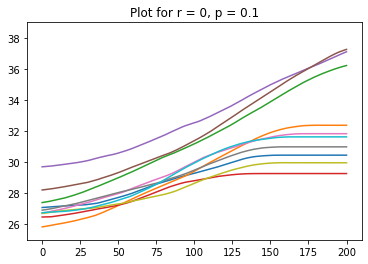

In [151]:
plot_data(julia_df, 0, 0.1)

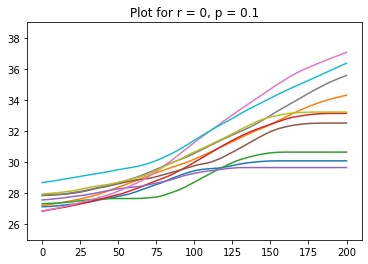

In [152]:
plot_data(mesa_df, 0, 0.1)

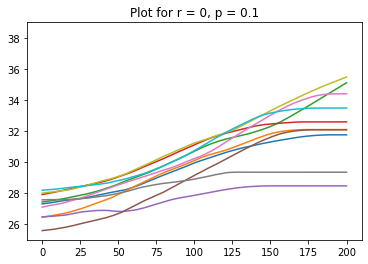

In [171]:
plot_data(netlogo_df, 0, 0.1)

## Low radius, High rewire

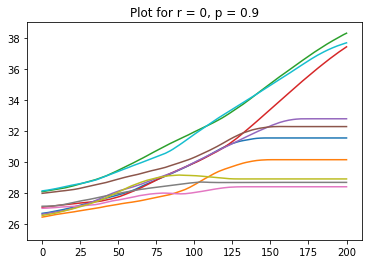

In [154]:
plot_data(julia_df, 0, 0.9)

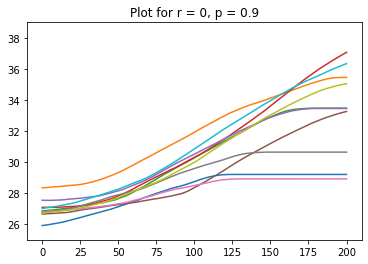

In [155]:
plot_data(mesa_df, 0, 0.9)

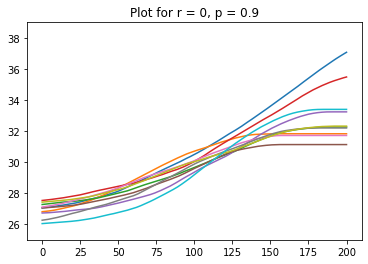

In [176]:
plot_data(netlogo_df, 0, 0.9)

## High radius, Low rewire

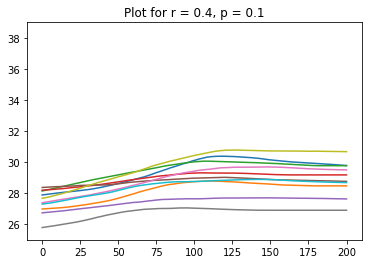

In [157]:
plot_data(julia_df, 0.4, 0.1)

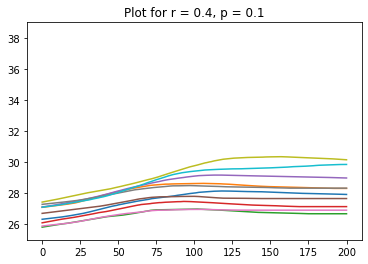

In [158]:
plot_data(mesa_df, 0.4, 0.1)

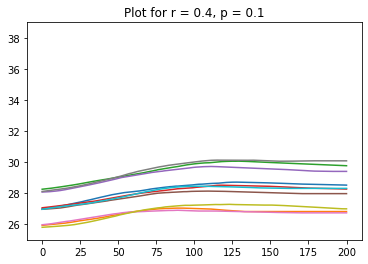

In [177]:
plot_data(netlogo_df, 0.4, 0.1)

## High Radius, High Rewire

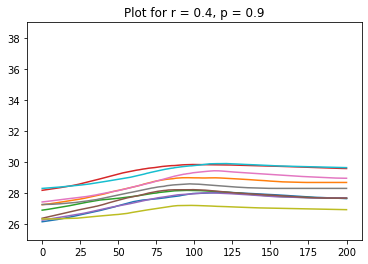

In [160]:
plot_data(julia_df, 0.4, 0.9)

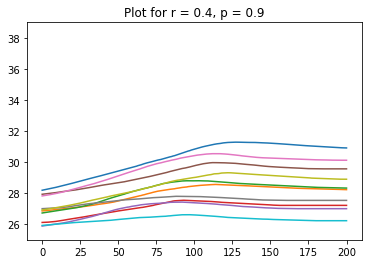

In [169]:
plot_data(mesa_df, 0.4, 0.9)

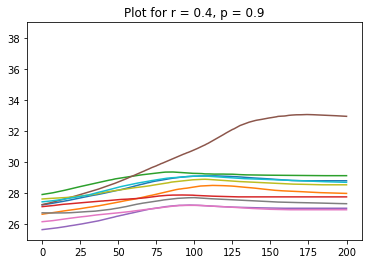

In [174]:
plot_data(netlogo_df, 0.4, 0.9)